In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
from sklearn.model_selection import train_test_split

def my_split_func(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 2)
    return X_train,X_test, y_train, y_test

In [2]:
#### for train data

train = pd.read_csv('Train.csv')

print(train.shape)

### for test data 

test = pd.read_csv('Test.csv')

print(test.shape)

(21454, 19)
(7194, 18)


### Country feature selection

In [12]:
test.country.value_counts().sort_values(ascending =False).head(10)

Uganda                          1584
Zimbabwe                        1189
Zambia                          1038
Burkina Faso                     997
Angola                           855
Democratic Republic of Congo     785
Benin                            746
Name: country, dtype: int64

In [15]:
count_7 = [x for x in train.country.value_counts().sort_values(ascending =False).head(7).index]
count_7

['Nigeria', 'Kenya', 'Tanzania', 'Malawi', 'Ethiopia', 'Ghana', 'Mali']

In [16]:
for country in count_7:
    train[country] = np.where(train.country == country, 1, 0)

In [25]:
train.columns

Index(['ID', 'country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'Target', 'Nigeria', 'Kenya',
       'Tanzania', 'Malawi', 'Ethiopia', 'Ghana', 'Mali'],
      dtype='object')

In [26]:
train_cols = ['ghsl_pop_density','ghsl_built_1990_to_2000','ghsl_built_1975_to_1990','ghsl_not_built_up',
            'landcover_crops_fraction','landcover_water_seasonal_10km_fraction',
            'dist_to_capital','dist_to_shoreline','landcover_urban_fraction', 'urban_or_rural','Target','Nigeria', 'Kenya', 'Tanzania', 'Malawi', 'Ethiopia', 'Ghana', 'Mali']

In [27]:
for_train = train[train_cols]
for_train.shape

(21454, 18)

In [30]:
train_dumi = pd.get_dummies(for_train, columns =['urban_or_rural'], drop_first = True)

In [32]:
train_dumi.shape

(21454, 18)

#### test data 

In [34]:
for_test = test.drop(['ID', 'year','ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_2000_to_2014','landcover_water_permanent_10km_fraction', 'nighttime_lights'], axis = 1)
for_test.head(2)

,country,urban_or_rural,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_seasonal_10km_fraction,dist_to_capital,dist_to_shoreline
0,Democratic Republic of Congo,R,0.000000,0.000523,0.999347,0.660758,0.990942,0.132264,0.032627,1249.294720,1364.592100
1,Democratic Republic of Congo,U,0.000238,0.001227,0.991437,6.441547,5.461365,0.452400,0.000000,821.019579,1046.028681


In [100]:
test_dum_1 = pd.get_dummies(for_test, columns =['urban_or_rural'], drop_first = True)
test_dum_2 = pd.get_dummies(test_dum_1, columns =['country'], drop_first = False)

In [103]:
test_dum_2.shape

(7194, 17)

In [36]:
X = train_dumi.drop('Target', axis = 1).values
y = train_dumi.Target.values

In [39]:
X_train,X_test, y_train, y_test = my_split_func(X,y)

In [67]:
len(y_train)

17163

In [74]:
#### simple NN

model_reg =   keras.Sequential([
    keras.layers.Dense(units = 200, kernel_initializer = 'he_uniform', 
                       input_shape = (17,)),
    keras.layers.Dense(100, kernel_initializer = 'he_uniform', activation = 'relu'),
    keras.layers.Dense(len(y_train))
    ])
    
    #tb_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/', histogram_freq =1)

model_reg.compile(
    optimizer = 'adam',
    loss = 'mse', metrics = ['mse']
    )

    
    
history = model_reg.fit(X_train, y_train, batch_size=10, validation_data=(X_test,y_test), epochs=5)

Epoch 1/5
1717/1717 [==============================] - 126s 73ms/step - loss: 8.4066 - mse: 8.4066 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 2/5
1717/1717 [==============================] - 122s 71ms/step - loss: 0.0507 - mse: 0.0507 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 3/5
1717/1717 [==============================] - 120s 70ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 4/5
1717/1717 [==============================] - 122s 71ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 5/5
1717/1717 [==============================] - 120s 70ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0190 - val_mse: 0.0190


In [78]:
preds = model_reg.predict(X_test)

In [87]:
X_train.shape, y_train.shape

((17163, 17), (17163,))

In [84]:
X_test.shape, y_test.shape, preds.shape

((4291, 17), (4291,), (4291, 17163))

In [90]:
# from sklearn.metrics import mean_squared_error as mse
# rmse = mse(y_test,preds, squared = False)
# rmse

In [96]:
X_test.shape, test_dum_2.values.shape

((4291, 17), (7194, 17))

In [105]:
test_preds = model_reg.predict(test_dum_2)
test_preds.shape

(7194, 17163)

In [116]:
train_copy = train.copy()

In [117]:
target = train.drop('Target', axis = 1)
train.shape

(21454, 19)

In [118]:
train['train']=1
test['train']=0
combined = pd.concat([train,test])

In [119]:
combined = combined.drop(['ID', 'year'], axis = 1)

In [352]:
combined.head()

,country,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target,train
0,Ethiopia,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783,1
1,Ethiopia,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898,1
2,Mozambique,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320,1
3,Malawi,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107,1
4,Guinea,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328,1


In [324]:
com_cols = ['ghsl_pop_density','ghsl_built_1990_to_2000','ghsl_built_1975_to_1990','ghsl_not_built_up',
            'landcover_crops_fraction','landcover_water_seasonal_10km_fraction',
            'dist_to_capital','dist_to_shoreline','landcover_urban_fraction', 'urban_or_rural','train']
#new_df = combined[com_cols]

In [375]:
cols = ['dist_to_shoreline', 'landcover_urban_fraction', 'urban_or_rural','train']
new_df = combined[cols]

In [376]:
new_df['Target'] = train.Target

In [377]:
new_df.head()

,dist_to_shoreline,landcover_urban_fraction,urban_or_rural,train,Target
0,769.338378,0.879484,R,1,0.132783
1,337.135243,0.601427,R,1,0.004898
2,169.913773,0.131900,R,1,0.097320
3,613.591610,2.017136,R,1,0.304107
4,192.926363,22.815984,U,1,0.605328


In [378]:
df_train_new = new_df[new_df['train']==1]
df_test_new = new_df[new_df['train']==0]
df_train_new.shape, df_test_new.shape

((21454, 5), (7194, 5))

In [379]:
df_test_new.drop('train', axis = 1, inplace = True)
df_train_new.drop('train', axis = 1, inplace = True)
df_train_new.shape, df_test_new.shape

((21454, 4), (7194, 4))

In [380]:
X_data = df_train_new.drop('Target', axis = 1)
y_data = df_train_new.Target

X_train,X_test, y_train, y_test= my_split_func(X_data, y_data)

In [381]:
train_dummies = pd.get_dummies(X_train, columns =['urban_or_rural'], drop_first = True)
test_dummies = pd.get_dummies(X_test, columns =['urban_or_rural'], drop_first = True)
train_dummies.shape, test_dummies.shape

((17163, 3), (4291, 3))

<AxesSubplot:>

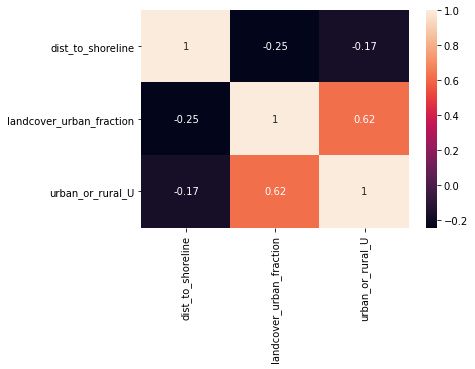

In [382]:
sns.heatmap(train_dummies.corr(), annot = True)

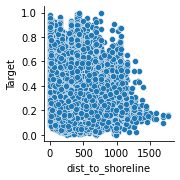

In [285]:
sns.pairplot(df_train_new,
    hue=None,
    x_vars=['dist_to_shoreline'],#, 'dist_to_shoreline', 'ghsl_pop_density'],
    y_vars=['Target'],
    kind='scatter',
    height=2.5,
    aspect=1)

In [286]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [287]:
#train_dummies['dist_to_shoreline'] = Scaler.fit_transform(train_dummies[['dist_to_shoreline']])

In [288]:
#test_dummies['dist_to_shoreline'] = Scaler.fit_transform(test_dummies[['dist_to_shoreline']])

In [383]:
train_dummies.shape, test_dummies.shape

((17163, 3), (4291, 3))

In [47]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 390, max_depth=100,num_leaves=17, random_state = 2)
LGBM.fit(X_train, y_train)
LGBM.score(X_test, y_test)

0.7370140371192497

In [48]:
from sklearn.metrics import mean_squared_error as mse
lgbm_preds = LGBM.predict(X_test)
rmse = mse(y_test,lgbm_preds, squared = False)
rmse

0.09995070130119528

In [52]:
from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor(n_estimators = 300, max_depth=10,max_leaf_nodes=17, random_state = 2)

RFC.fit(X_train, y_train)
RFC.score(X_test, y_test)

0.6609578555418345

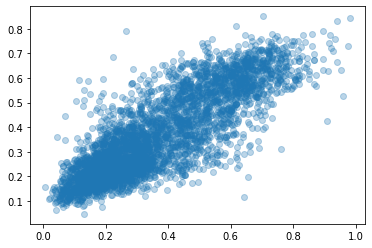

In [351]:
from matplotlib import pyplot as plt
plt.scatter(y_test, LGBM.predict(test_dummies), alpha=0.3)

<AxesSubplot:xlabel='country', ylabel='count'>

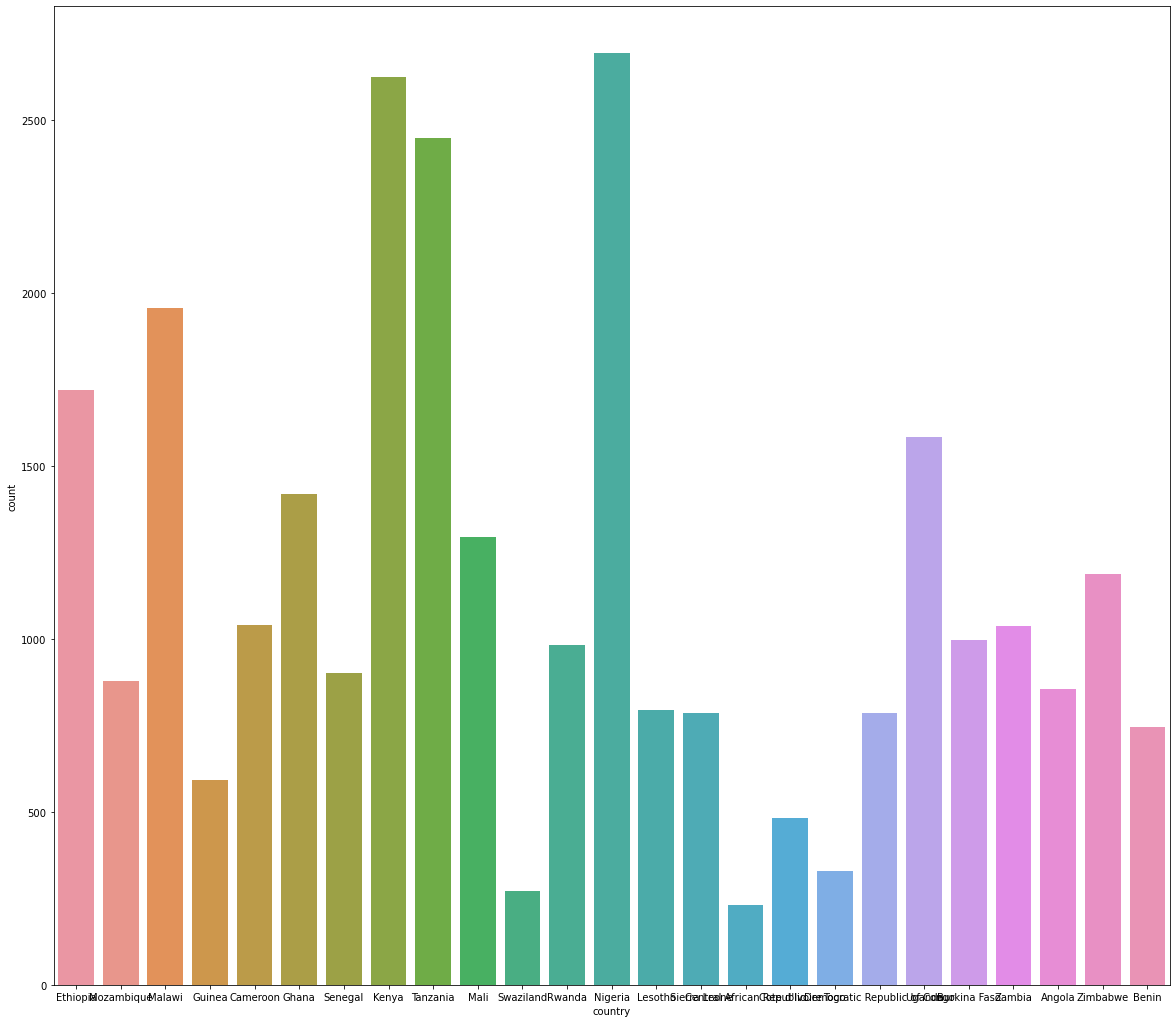

In [64]:
plt.figure(figsize = (20,18))
sns.countplot(combined['country'])

In [65]:
c = combined.country.value_counts().to_dict()
c

{'Nigeria': 2695,
 'Kenya': 2626,
 'Tanzania': 2450,
 'Malawi': 1957,
 'Ethiopia': 1721,
 'Uganda': 1584,
 'Ghana': 1419,
 'Mali': 1295,
 'Zimbabwe': 1189,
 'Cameroon': 1041,
 'Zambia': 1038,
 'Burkina Faso': 997,
 'Rwanda': 984,
 'Senegal': 903,
 'Mozambique': 879,
 'Angola': 855,
 'Lesotho': 794,
 'Sierra Leone': 785,
 'Democratic Republic of Congo': 785,
 'Benin': 746,
 'Guinea': 593,
 "Cote d'Ivoire": 481,
 'Togo': 330,
 'Swaziland': 270,
 'Central African Republic': 231}

In [66]:
combined.country = combined.country.map(c)
combined.head(10)

,country,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,train
0,1721,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,1
1,1721,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,1
2,879,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,1
3,1957,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,1
4,593,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,1
5,1721,U,0.0,0.008623,0.019409,0.059886,0.082682,0.829400,203.580507,24.629433,31.235708,0.000000,0.008223,22.981970,9.803702,487.790852,1
6,1041,R,0.0,0.000131,0.000149,0.000168,0.000093,0.999458,0.342950,0.011798,0.251395,0.000000,0.000289,0.000000,290.621111,477.563353,1
7,1419,R,0.0,0.001298,0.001042,0.000219,0.000347,0.997094,14.340860,42.594576,4.180947,0.011511,0.112440,0.000000,438.103890,435.816271,1
8,903,U,0.0,0.000000,0.000751,0.001485,0.000035,0.997729,19.468199,11.332716,2.191206,0.410365,4.746894,0.528963,482.262914,320.867328,1
9,1721,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.105011,0.147196,0.000000,0.230172,0.000000,533.139137,1016.580304,1


In [67]:
train_data = combined[combined['train']==1]
test_data = combined[combined['train']==0]

In [68]:
train_data.drop('train', axis = 1, inplace = True)
test_data.drop('train', axis = 1, inplace = True)

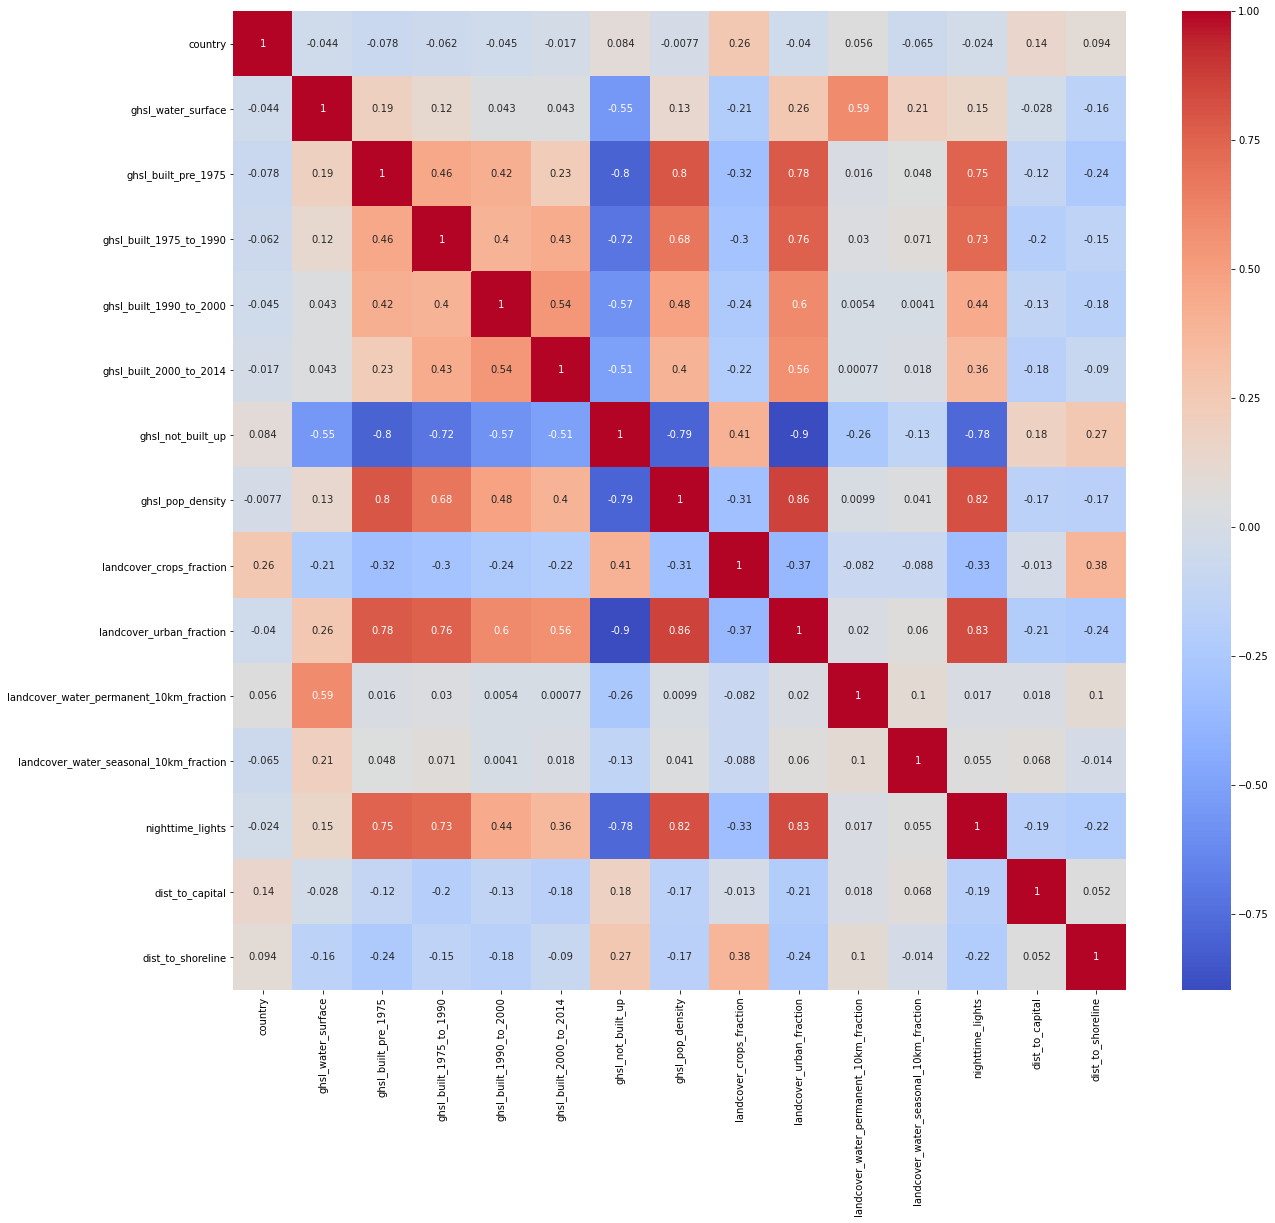

In [69]:
plt.figure(figsize = (20,18))
sns.heatmap(train_data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [70]:
# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

In [71]:
# corr_features = correlation(train_data, 0.55)
# len(set(corr_features))

In [28]:
# corr_features

{'ghsl_not_built_up',
 'ghsl_pop_density',
 'landcover_urban_fraction',
 'landcover_water_permanent_10km_fraction',
 'nighttime_lights'}

In [29]:
# cols = ['ghsl_not_built_up',
#  'ghsl_pop_density',
#  'landcover_urban_fraction',
#  'landcover_water_permanent_10km_fraction',
#  'nighttime_lights']

# train_data.drop(cols, axis = 1, inplace = True)

In [33]:
t#est_data.drop(cols, axis = 1, inplace = True)

In [34]:
#train_data.shape, test_data.shape

((21454, 11), (7194, 11))

In [72]:
train_dummies = pd.get_dummies(train_data, columns =['urban_or_rural'], drop_first = True)
test_dummies = pd.get_dummies(test_data, columns =['urban_or_rural'], drop_first = True)
train_dummies.shape, test_dummies.shape

((21454, 16), (7194, 16))

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['country', 'dist_to_capital']] = scaler.fit_transform(X_train[['country', 'dist_to_capital']])

In [93]:
X_test[['country', 'dist_to_capital']] = scaler.fit_transform(X_test[['country', 'dist_to_capital']])

In [73]:
X_train, X_test, y_train, y_test = my_split_func(train_dummies, train_copy.Target)

In [96]:
X_train.shape

(17163, 16)

In [97]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 130, random_state = 2)
LGBM.fit(X_train, y_train)
LGBM.score(X_test, y_test)

0.7435994767482623

In [100]:
from sklearn.metrics import mean_squared_error as mse
lgbm_preds = LGBM.predict(X_test)
rmse = mse(y_test,lgbm_preds, squared = False)
rmse

0.09731912472567882

In [ ]:
from catboost import CatBoostRegressor

CBR = CatBoostRegressor(random_seed = 20)

CBR.fit(X_train, y_train)
CBR.score(X_test,y_test)

In [99]:
from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor(n_estimators = 120, random_state = 4)

RFC.fit(X_train, y_train)
RFC.score(X_test, y_test)

0.7329834855005566

In [78]:
rfc_preds = RFC.predict(X_test)
rmse = np.sqrt(mse(y_test,rfc_preds))
rmse

0.09956789438078707

In [80]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(n_estimators=120, random_state = 100)
XGBR.fit(X_train,y_train)
XGBR.score(X_test,y_test)

0.7307587787729704

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [193]:
df_train.shape, df_test.shape

((21454, 41), (7194, 41))

In [194]:
X=df_train
y=train_copy.Target

In [195]:
train_copy.Target.shape

(21454,)

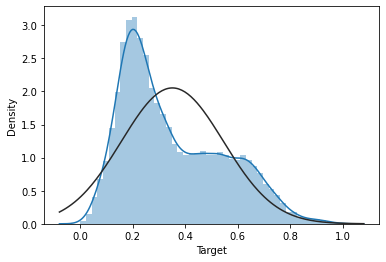

In [180]:
from scipy.stats import norm, skew


#train['target'] = np.log1p(train['Target'])
sns.distplot(train_copy['Target'], fit=norm);

In [ ]:
print("Skewness: %f" % train['Target'].skew())
print("Kurtosis: %f" % train['Target'].kurt())

In [ ]:
td = train.drop(['ID', 'year', 'Target'], axis = 'columns')
tsd = test.drop(['ID', 'year'], axis = 'columns')

td.shape, tsd.shape

In [ ]:
td1 = pd.get_dummies(td, columns = ['urban_or_rural', 'country'], drop_first = False)
tsd1 = pd.get_dummies(tsd, columns = ['urban_or_rural', 'country'], drop_first = True)

td1.shape, tsd1.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(td1)
scaled_data = scaler.transform(td1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=21)
pca.fit(scaled_data)

td_pca = pca.transform(scaled_data)

In [ ]:
td_pca.shape

In [ ]:
X = td_pca
y = train.Target

In [ ]:
X.shape, y.shape

In [198]:
X_train, X_test, y_train, y_test =my_split_func(X,y)

In [199]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([3.28332156e-02, 2.55219837e-01, 2.81687206e-01, 2.48910820e-01,
       1.95912095e-01, 2.65378031e-01, 2.99425200e-01, 8.01502334e-02,
       3.97348873e-01, 6.22056537e-02, 6.36612266e-02, 3.95575354e-01,
       1.26823116e-01, 1.24152575e-01, 1.33226763e-15, 1.33226763e-15,
       1.33226763e-15, 2.48904689e-03, 4.69075823e-03, 3.98181926e-03,
       1.33226763e-15, 7.19583881e-02, 1.62951960e-02, 5.20288335e-03,
       4.15194735e-03, 2.44104094e-03, 2.77996152e-02, 6.80217476e-04,
       2.60700011e-03, 2.05569140e-02, 1.02037818e-02, 9.46033327e-03,
       8.27145669e-04, 5.92861492e-03, 9.66822476e-03, 4.74934476e-03,
       1.33226763e-15, 1.33226763e-15, 1.33226763e-15, 2.72347274e-01,
       2.72347274e-01])

In [200]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

landcover_urban_fraction                   3.973489e-01
nighttime_lights                           3.955754e-01
ghsl_pop_density                           2.994252e-01
ghsl_built_1975_to_1990                    2.816872e-01
urban_or_rural_U                           2.723473e-01
urban_or_rural_R                           2.723473e-01
ghsl_not_built_up                          2.653780e-01
ghsl_built_pre_1975                        2.552198e-01
ghsl_built_1990_to_2000                    2.489108e-01
ghsl_built_2000_to_2014                    1.959121e-01
dist_to_capital                            1.268231e-01
dist_to_shoreline                          1.241526e-01
landcover_crops_fraction                   8.015023e-02
country_Ethiopia                           7.195839e-02
landcover_water_seasonal_10km_fraction     6.366123e-02
landcover_water_permanent_10km_fraction    6.220565e-02
ghsl_water_surface                         3.283322e-02
country_Malawi                             2.779

<AxesSubplot:>

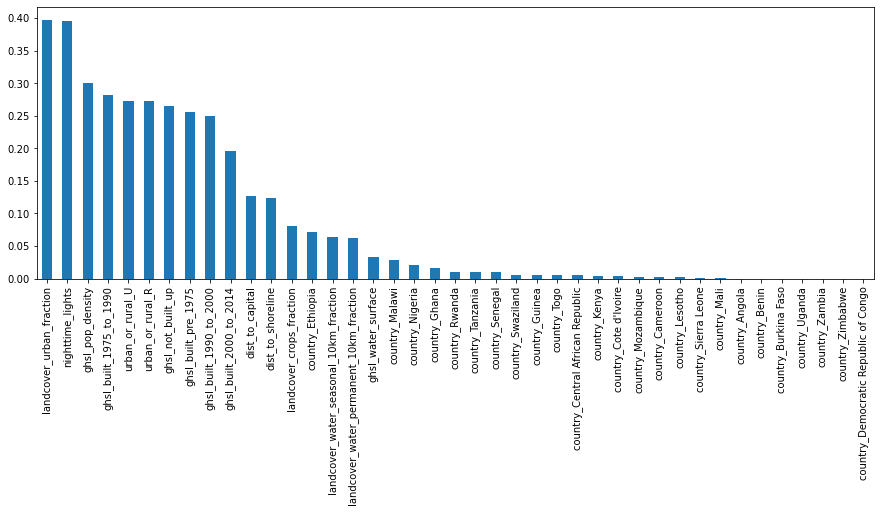

In [201]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [202]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x7f04bee28f70>)

In [203]:
X_train.columns[selected_top_columns.get_support()]

Index(['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'country_Ethiopia',
       'country_Ghana', 'country_Malawi', 'country_Nigeria',
       'urban_or_rural_R', 'urban_or_rural_U'],
      dtype='object')

In [217]:
use_cols = ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
        'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'country_Ethiopia',
       'country_Ghana', 'country_Malawi', 'country_Nigeria',
       'urban_or_rural_R']

In [220]:
X_train_new = X_train[use_cols]
X_test_new = X_test[use_cols]
df_test_new = df_test[use_cols]
X_train_new.shape,X_test_new.shape, df_test_new.shape

((16090, 18), (5364, 18), (7194, 18))

In [ ]:
df_test_new = df_test[use_cols]

<AxesSubplot:>

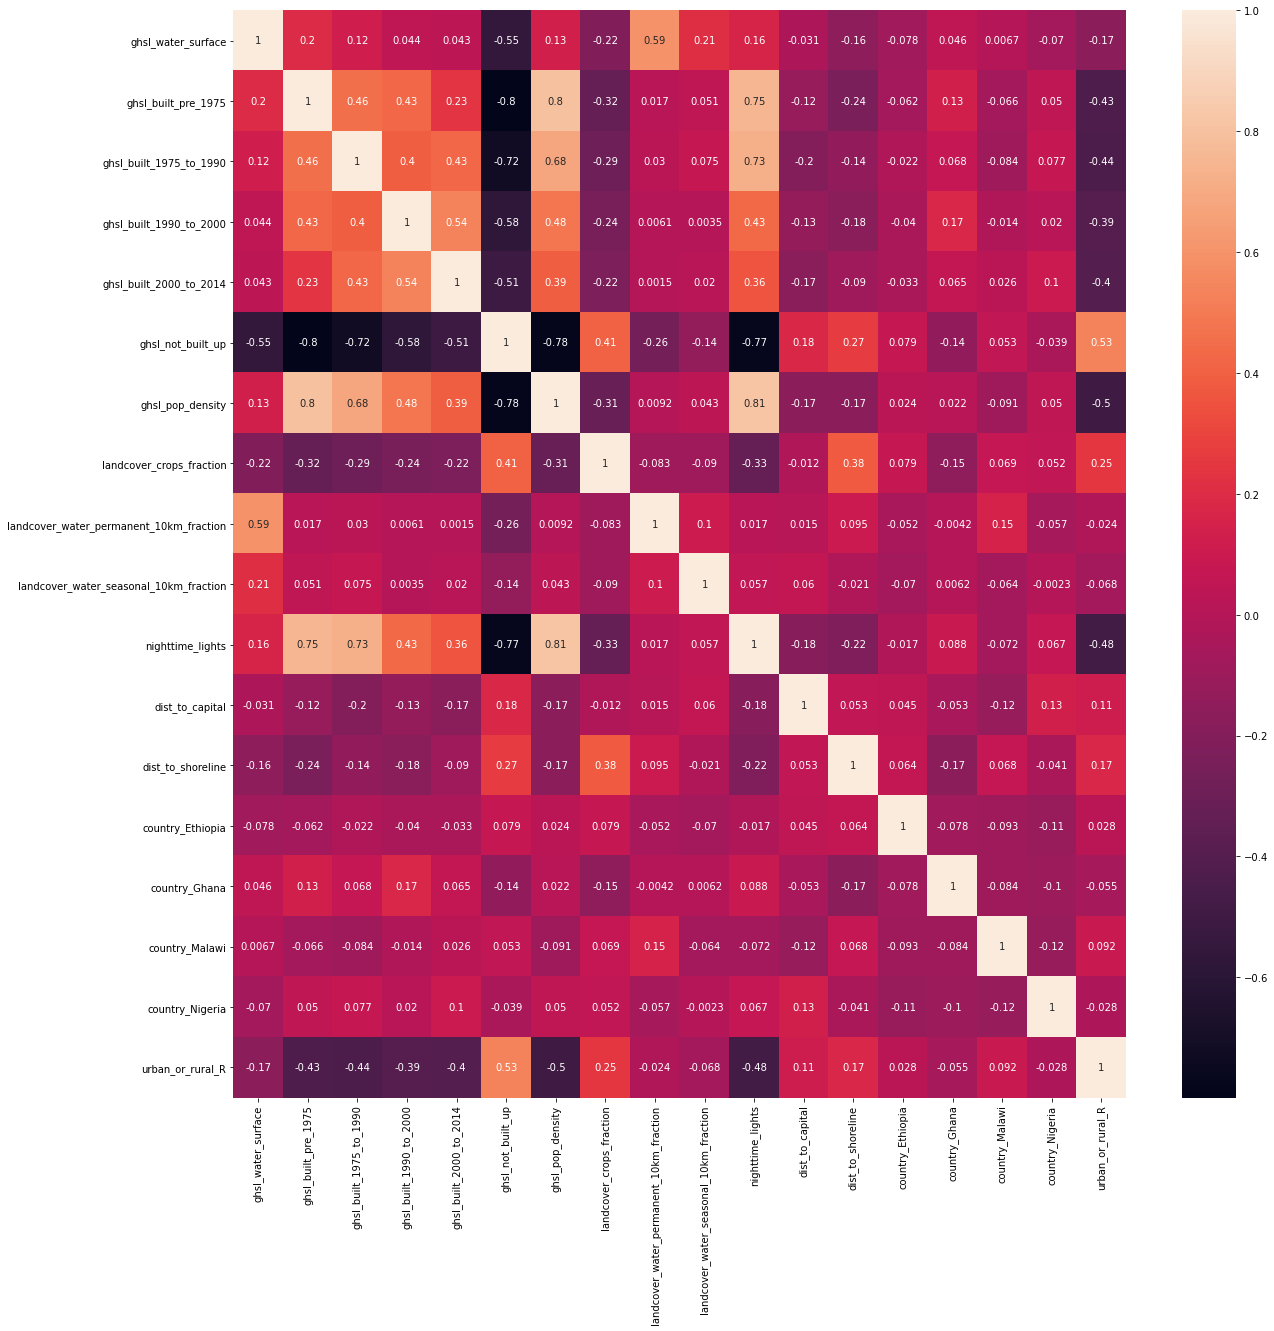

In [245]:
import seaborn as sns
corr=X_train_new.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [86]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
# #Using Pearson Correlation
# plt.figure(figsize=(12,10))
# cor = X_train.corr()
# sns.heatmap(cor, annot=True, square=True,cmap=plt.cm.CMRmap_r)
# plt.show()

In [211]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [216]:
corr_features = correlation(X_train_new, 0.85)
len(set(corr_features))

1

In [215]:
corr_features

{'landcover_urban_fraction', 'nighttime_lights'}

In [153]:
cols_drop = ['landcover_urban_fraction', 'urban_or_rural_U']
X_train.drop(cols_drop, axis = 1, inplace = True)
X_test.drop(cols_drop, axis = 1, inplace = True)
df_test.drop(cols_drop, axis = 1, inplace = True)

In [154]:
X_train.shape,X_test.shape,df_test.shape

((16090, 37), (5364, 37), (7194, 37))

In [56]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [69]:
def my_reg_ANN():
    """
    Some standard imports for the ANN
    
    """
    
    ### building layers with regularizations
    
    model =   keras.Sequential([
    keras.layers.Dense(units = 300, kernel_initializer = 'he_uniform', 
                       input_shape = (17,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, kernel_initializer = 'he_uniform', activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, kernel_initializer = 'he_uniform', activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(y_train), kernel_initializer = 'he_uniform')
    ])
    
    #tb_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/', histogram_freq =1)

    model.compile(
    optimizer = 'adam',
    loss = 'mse', metrics = ['mse']
    )

    
    
    return model

In [70]:
model = my_reg_ANN()
model.fit(X_train, y_train, batch_size=10, validation_data=(X_test,y_test), epochs=15)

Epoch 1/15
1717/1717 [==============================] - 153s 89ms/step - loss: 40039.5123 - mse: 40039.5123 - val_loss: 0.1623 - val_mse: 0.1623
Epoch 2/15
1717/1717 [==============================] - 147s 86ms/step - loss: 100.1935 - mse: 100.1935 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 3/15
1717/1717 [==============================] - 145s 85ms/step - loss: 18.6194 - mse: 18.6194 - val_loss: 0.0982 - val_mse: 0.0982
Epoch 4/15
1717/1717 [==============================] - 147s 86ms/step - loss: 7.3408 - mse: 7.3408 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 5/15
1717/1717 [==============================] - 137s 80ms/step - loss: 3.5209 - mse: 3.5209 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 6/15
1717/1717 [==============================] - 143s 83ms/step - loss: 0.8755 - mse: 0.8755 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 7/15
1717/1717 [==============================] - 146s 85ms/step - loss: 2.1625 - mse: 2.1625 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 8/15
1717/1717 [=====

In [71]:
model.predict(X_test)[:10]

array([[0.35448846, 0.35445473, 0.3545156 , ..., 0.3546398 , 0.3541046 ,
        0.3540383 ],
       [0.35448846, 0.35445473, 0.3545156 , ..., 0.3546398 , 0.3541046 ,
        0.3540383 ],
       [0.35448846, 0.35445473, 0.3545156 , ..., 0.3546398 , 0.3541046 ,
        0.3540383 ],
       ...,
       [0.35448846, 0.35445473, 0.3545156 , ..., 0.3546398 , 0.3541046 ,
        0.3540383 ],
       [0.35448846, 0.35445473, 0.3545156 , ..., 0.3546398 , 0.3541046 ,
        0.3540383 ],
       [0.35448846, 0.35445473, 0.3545156 , ..., 0.3546398 , 0.3541046 ,
        0.3540383 ]], dtype=float32)

In [24]:
sm = pd.read_csv('SampleSubmission.csv')

In [25]:
sm.shape

(7194, 2)

In [28]:
sm.to_csv('Sixteen_submission.csv', index = False)

In [92]:
country_stats = train.groupby('country')['country'].agg('count').sort_values(ascending = False)


In [94]:
country_as_other = country_stats[country_stats<=1300]

In [95]:
train_copy = train.copy()

In [96]:
train_copy.country = train_copy.country.apply(lambda x: 'other' if x in country_as_other else x)
len(train_copy.country.unique())

7

In [97]:
len(test.country.unique())

7

In [98]:
td = train_copy.drop(['ID', 'year'], axis = 'columns')
tsd = test.drop(['ID', 'year'], axis = 'columns')

In [102]:
td1 = pd.get_dummies(td, columns = ['urban_or_rural', 'country'], drop_first = True)

In [103]:
td1 = pd.get_dummies(td, columns = ['urban_or_rural', 'country'], drop_first = True)
tsd1 = pd.get_dummies(tsd, columns = ['urban_or_rural', 'country'], drop_first = True)

In [109]:
tsd1.head() #, tsd1.shape

,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,...,nighttime_lights,dist_to_capital,dist_to_shoreline,urban_or_rural_U,country_Benin,country_Burkina Faso,country_Democratic Republic of Congo,country_Uganda,country_Zambia,country_Zimbabwe
0,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,...,0.000000,1249.294720,1364.592100,0,0,0,1,0,0,0
1,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,...,0.000000,821.019579,1046.028681,1,0,0,1,0,0,0
2,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,...,60.070041,3.620455,906.057334,1,0,0,0,1,0,0
3,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,...,1.333999,109.493969,775.139189,1,0,1,0,0,0,0
4,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,...,0.502203,133.643319,835.591501,0,0,0,0,0,1,0


In [107]:
X = td1.drop(td1[['Target']], axis = 'columns').values
y = td1.Target.values

In [89]:
# plt.figure(figsize = (10,8))
# sns.heatmap(td1.corr(),
#            annot = True,
#            linewidths = .5,
#            center = 0,
#            cbar = False,
#            cmap = None)
# plt.show()

In [73]:
#X_new = pd.concat([X, tsd1.copy()], axis = 0)

In [64]:
X_new.shape

(28648, 14)

In [124]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.25, random_state = 7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16090, 21), (5364, 21), (16090,), (5364,))

In [243]:
### estima 130, split_state = 7


#X_train,X_test, y_train, y_test = my_split_func(X,y)

from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 130, random_state = 2)
LGBM.fit(X_train_new, y_train)
LGBM.score(X_test_new, y_test)

0.7430788301957194

In [239]:
from sklearn.metrics import mean_squared_error as mse
lgbm_preds = LGBM.predict(X_test_new)
rmse = np.sqrt(mse(y_test,lgbm_preds))
rmse

0.09930712457779725

In [222]:
#X_train,X_test, y_train, y_test = my_split_func(X,y)

from catboost import CatBoostRegressor

CBR = CatBoostRegressor(random_seed = 20)

CBR.fit(X_train_new, y_train)
CBR.score(X_test_new,y_test)

Learning rate set to 0.063998
0:	learn: 0.1862566	total: 20.7ms	remaining: 20.7s
1:	learn: 0.1793473	total: 36.6ms	remaining: 18.3s
2:	learn: 0.1728100	total: 51.5ms	remaining: 17.1s
3:	learn: 0.1667435	total: 62.4ms	remaining: 15.5s
4:	learn: 0.1612273	total: 68.9ms	remaining: 13.7s
5:	learn: 0.1561438	total: 76.9ms	remaining: 12.7s
6:	learn: 0.1515077	total: 81.6ms	remaining: 11.6s
7:	learn: 0.1471764	total: 86.4ms	remaining: 10.7s
8:	learn: 0.1433072	total: 90.8ms	remaining: 10s
9:	learn: 0.1399773	total: 95.1ms	remaining: 9.41s
10:	learn: 0.1365539	total: 99.2ms	remaining: 8.92s
11:	learn: 0.1336064	total: 103ms	remaining: 8.52s
12:	learn: 0.1309748	total: 108ms	remaining: 8.18s
13:	learn: 0.1283994	total: 112ms	remaining: 7.89s
14:	learn: 0.1262903	total: 117ms	remaining: 7.65s
15:	learn: 0.1242837	total: 121ms	remaining: 7.44s
16:	learn: 0.1222919	total: 126ms	remaining: 7.27s
17:	learn: 0.1205268	total: 130ms	remaining: 7.1s
18:	learn: 0.1190028	total: 135ms	remaining: 6.95s
19:

0.7440809181122787

In [244]:
cbr_preds = CBR.predict(X_test_new)
rmse = np.sqrt(mse(y_test, cbr_preds))
rmse

0.0990187144068133

In [233]:
#X_train,X_test, y_train, y_test = my_split_func(X,y)


from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor(random_state = 4)

RFC.fit(X_train_new, y_train)
RFC.score(X_test_new, y_test)

0.7297302734714081

In [237]:
rfc_preds = RFC.predict(X_test_new)

In [238]:
from sklearn.metrics import mean_squared_error as mse
rmse = np.sqrt(mse(y_test,rfc_preds))
rmse

0.10175708327093884

In [223]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(random_state = 100)
XGBR.fit(X_train_new,y_train)
XGBR.score(X_test_new,y_test)

0.7295927330733809

In [229]:
preds = CBR.predict(df_test_new)
preds[:10]

array([0.19194572, 0.18317264, 0.606079  , 0.41990297, 0.27610725,
       0.2143593 , 0.21721016, 0.22074655, 0.16151817, 0.25265791])

In [230]:
s = pd.read_csv('SampleSubmission.csv')
s['Target'] = preds

In [231]:
s.to_csv('jSubmission.csv', index = False)

In [227]:
s.isna().sum()

ID        0
Target    0
dtype: int64

In [228]:
s.head()

,ID,Target
0,ID_AAcismbB,0.156312
1,ID_AAeBMsji,0.228195
2,ID_AAjFMjzy,0.611215
3,ID_AAmMOEEC,0.417036
4,ID_ABguzDxp,0.253940
